# Simple Example in Tensorflow
Create a data set where X and y are linearly dependent and then use Tensorflow to estimate the linear model.

## Import

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np

## Create data. 
$y = X * 0.1 + 0.3 + error$

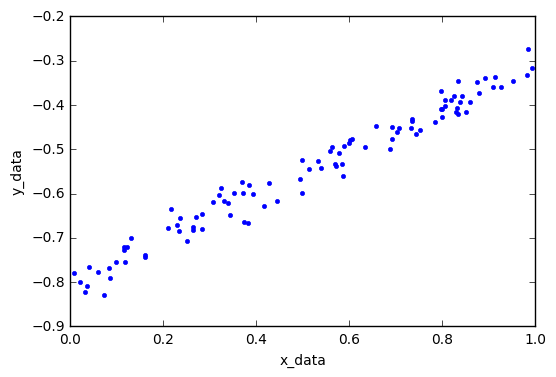

In [2]:
# Create 100 phony x, y data points in NumPy, y = x * 0.1 + 0.3
x_data = np.random.rand(100).astype(np.float32)
y_data = x_data * 0.5 - 0.8 + np.random.randn(len(x_data))*0.025

plt.plot(x_data,y_data,'.')
plt.xlabel('x_data')
plt.ylabel('y_data')
plt.show()

In [3]:
# Try to find values for W and b that compute y_data = W * x_data + b
# Here W = 0.1 and b = -0.3
# Set as variables W and b and initialize them
W = tf.Variable(tf.random_uniform([1], -1.0, 1.0))
b = tf.Variable(tf.zeros([1]))

# Model for the data.
y = W * x_data + b

The loss(cost function) is calculated as the mean squared error. Use Gradient descent with a learning rate of 0.5 to minimize the loss.

In [4]:
# Minimize the mean squared errors.
loss = tf.reduce_mean(tf.square(y - y_data))
optimizer = tf.train.GradientDescentOptimizer(0.3)
train = optimizer.minimize(loss)

## Running Tensorflow

In [5]:
# Before starting, initialize the variables.  We will 'run' this first.
init = tf.global_variables_initializer()

sess = tf.Session()
sess.run(init)

# Running the optimization. 200 iteration. Plot the values of W and b every 10 iterations.
step_count = []
W_count = []
b_count = []
for step in range(201):
    sess.run(train)
    if step % 10 == 0:
        print(step, sess.run(W), sess.run(b))
        step_count.append(step)
        W_count.append(sess.run(W))
        b_count.append(sess.run(b))



0 [-0.04844727] [-0.3658936]
10 [ 0.08617638] [-0.57779211]
20 [ 0.2167003] [-0.64929217]
30 [ 0.3050479] [-0.69768834]
40 [ 0.36484766] [-0.73044622]
50 [ 0.40532431] [-0.75261903]
60 [ 0.43272173] [-0.76762712]
70 [ 0.4512662] [-0.77778566]
80 [ 0.46381834] [-0.78466159]
90 [ 0.47231451] [-0.78931576]
100 [ 0.47806525] [-0.79246598]
110 [ 0.48195782] [-0.79459828]
120 [ 0.48459256] [-0.79604161]
130 [ 0.48637596] [-0.79701853]
140 [ 0.48758307] [-0.79767978]
150 [ 0.48840013] [-0.79812735]
160 [ 0.48895314] [-0.79843026]
170 [ 0.48932749] [-0.79863536]
180 [ 0.48958087] [-0.79877412]
190 [ 0.48975235] [-0.79886806]
200 [ 0.4898684] [-0.79893166]


The values of W and b converge to expected values in 100 interations. However, this will depend on the noise in the data and learning rate used.

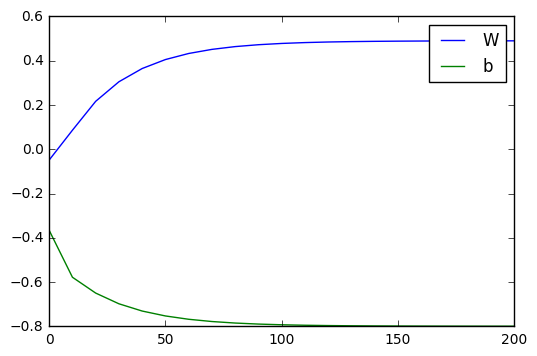

In [6]:
# Plotting W and b
plt.plot(step_count,W_count)
plt.plot(step_count,b_count)
plt.legend(['W','b'])

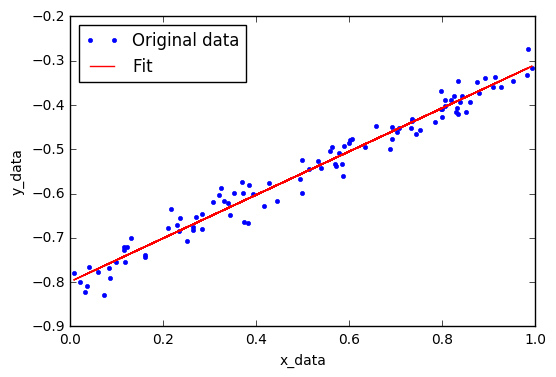

In [7]:
# Plotting the 
y_pred = sess.run(W)*x_data + sess.run(b)
plt.plot(x_data,y_data,'.')
plt.plot(x_data,y_pred,'r-')
plt.xlabel('x_data')
plt.ylabel('y_data')
plt.legend(['Original data','Fit'],loc='best')
plt.show()

####  Using placeholder. Useful when working in batch mode.

In [8]:
rng = np.random
X = tf.placeholder("float") # store one value of x_data
Y = tf.placeholder("float") # store one value of y_data

W1 = tf.Variable(rng.randn(),name="weight") 
b1 = tf.Variable(rng.randn(),name="bias")

# Here since each value will be passes one at a time, the equation 
# changes to mulitplication.
y_pred = tf.add(tf.mul(X,W1),b1) 


loss1 = tf.reduce_sum(tf.pow(y_pred-Y,2))/(2*len(x_data))

optimizer1 = tf.train.GradientDescentOptimizer(0.5).minimize(loss1)



In [9]:
init = tf.global_variables_initializer()

with tf.Session() as sess:
    sess.run(init)
    
    for i in range (201):
        
        #During each epoch, a loop is ran to pass each value in dataset.
        for (x,y) in zip(x_data,y_data):
            sess.run(optimizer1,feed_dict={X:x,Y:y})
            
        if i%10 == 0:
            print(i, sess.run(W1), sess.run(b1))
            

0 0.153321 -0.0520867
10 0.0720756 -0.571333
20 0.186185 -0.634225
30 0.269338 -0.679393
40 0.329729 -0.712197
50 0.373589 -0.736021
60 0.405443 -0.753322
70 0.428577 -0.765889
80 0.445378 -0.775015
90 0.457581 -0.781643
100 0.466442 -0.786456
110 0.472879 -0.789952
120 0.477552 -0.792491
130 0.480947 -0.794335
140 0.483412 -0.795674
150 0.485204 -0.796647
160 0.486503 -0.797353
170 0.487447 -0.797865
180 0.488133 -0.798238
190 0.488631 -0.798508
200 0.488993 -0.798705


We get similar answer as before. However, using 2 for loops make the entire process much slower.

### Using placeholder for entire array

In [10]:
X2 = tf.placeholder(tf.float32,[len(x_data),])
Y2 = tf.placeholder(tf.float32,[len(y_data),])

W2 = tf.Variable(rng.randn(1),dtype=tf.float32,name = "weight") 
b2 = tf.Variable(rng.randn(1),dtype=tf.float32,name = "bias")

y_pred2 = tf.add(tf.mul(X2,W2),b2)

loss2 = tf.reduce_mean(tf.square(Y2-y_pred2))

optimizer2 = tf.train.GradientDescentOptimizer(0.5).minimize(loss2)

In [11]:
init = tf.global_variables_initializer()

with tf.Session() as sess:
    sess.run(init)
    for i in range(201):
        sess.run(optimizer2,feed_dict={X2:x_data,Y2:y_data})
        
        if i%10 == 0:
            print(i, sess.run(W2), sess.run(b2))
            

0 [-0.45040768] [-1.00799835]
10 [ 0.16143768] [-0.61902195]
20 [ 0.32009879] [-0.70593309]
30 [ 0.40216902] [-0.75089061]
40 [ 0.44462153] [-0.77414572]
50 [ 0.46658093] [-0.78617495]
60 [ 0.4779399] [-0.79239732]
70 [ 0.48381552] [-0.79561591]
80 [ 0.48685485] [-0.79728085]
90 [ 0.48842698] [-0.79814202]
100 [ 0.48924023] [-0.7985875]
110 [ 0.48966092] [-0.79881799]
120 [ 0.48987851] [-0.7989372]
130 [ 0.48999101] [-0.79899883]
140 [ 0.49004927] [-0.79903072]
150 [ 0.49007934] [-0.79904723]
160 [ 0.49009493] [-0.79905576]
170 [ 0.49010298] [-0.79906017]
180 [ 0.49010715] [-0.79906243]
190 [ 0.49010935] [-0.79906362]
200 [ 0.4901104] [-0.79906422]


As you can see, that we have solved the linear regression in 3 different ways. Tensorflow provides great flexibibity in terms of how you want to setup the Tensor Graph.